#**DATA EXPLORATORY ANALYSIS**





---


# **5. Exploratory Data Analysis**

The EDA involved employing a range of techniques such as data visualization and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

The target feature is **Performance Rating**.

In [ ]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis'

Mounted at /content/gdrive
/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis


In [ ]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **5.1 Univariate Analysis**

In [ ]:
# load preprocessed data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/pre_processed_data.csv')

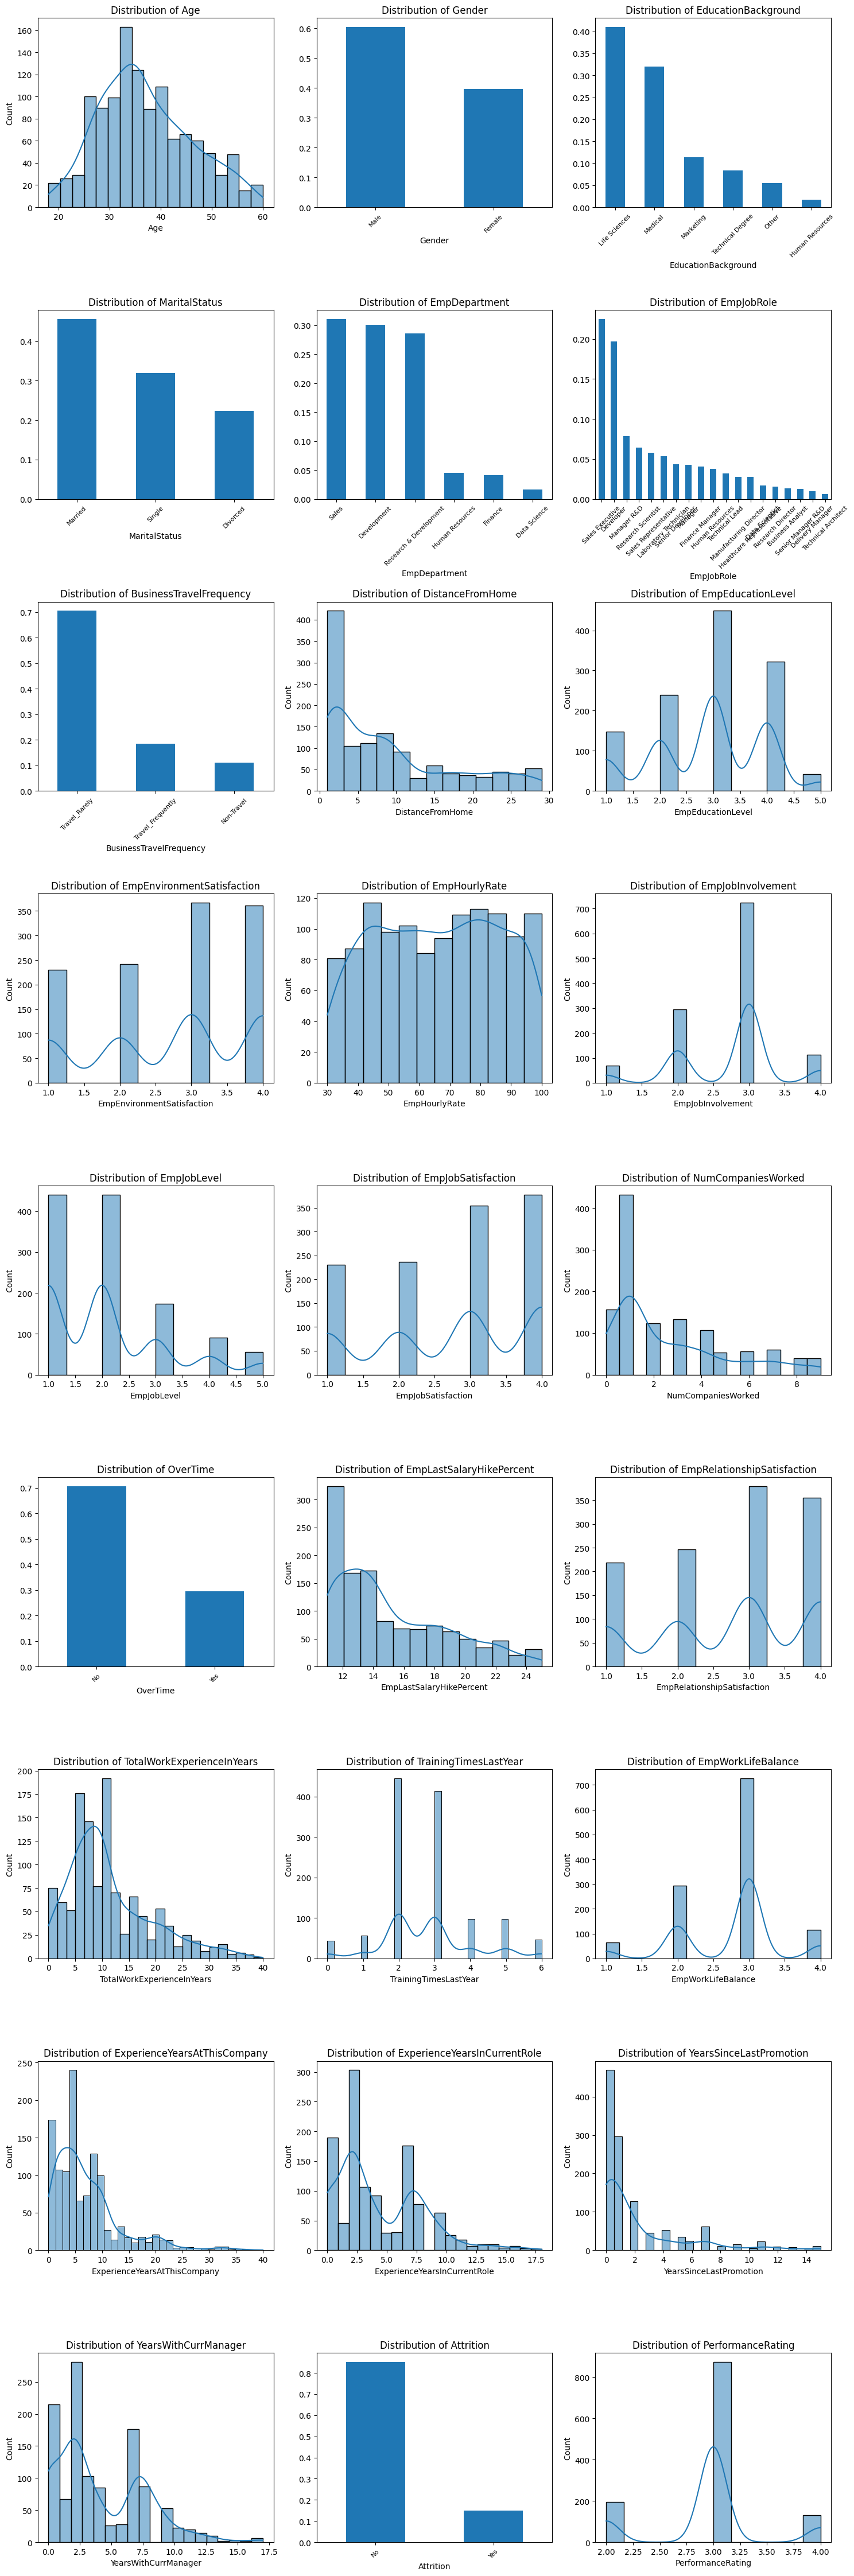

In [ ]:
# univariate analysis of employee performance for df, excluding EmpNumber.

cols_to_plot = [col for col in df.columns]

# Calculate the number of rows and columns for subplots
num_cols = 3  # Adjust as needed
num_rows = (len(cols_to_plot) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration


for i, col in enumerate(cols_to_plot):
    if df[col].dtype == 'object':
        df[col].value_counts(normalize = True).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45, labelsize=8) # Adjust label size and rotation
    elif df[col].dtype in ['int64', 'float64']:
      sns.histplot(df[col], kde=True, ax=axes[i])
      axes[i].set_title(f'Distribution of {col}')


    # Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## **5.2 Bivariate Analysis**

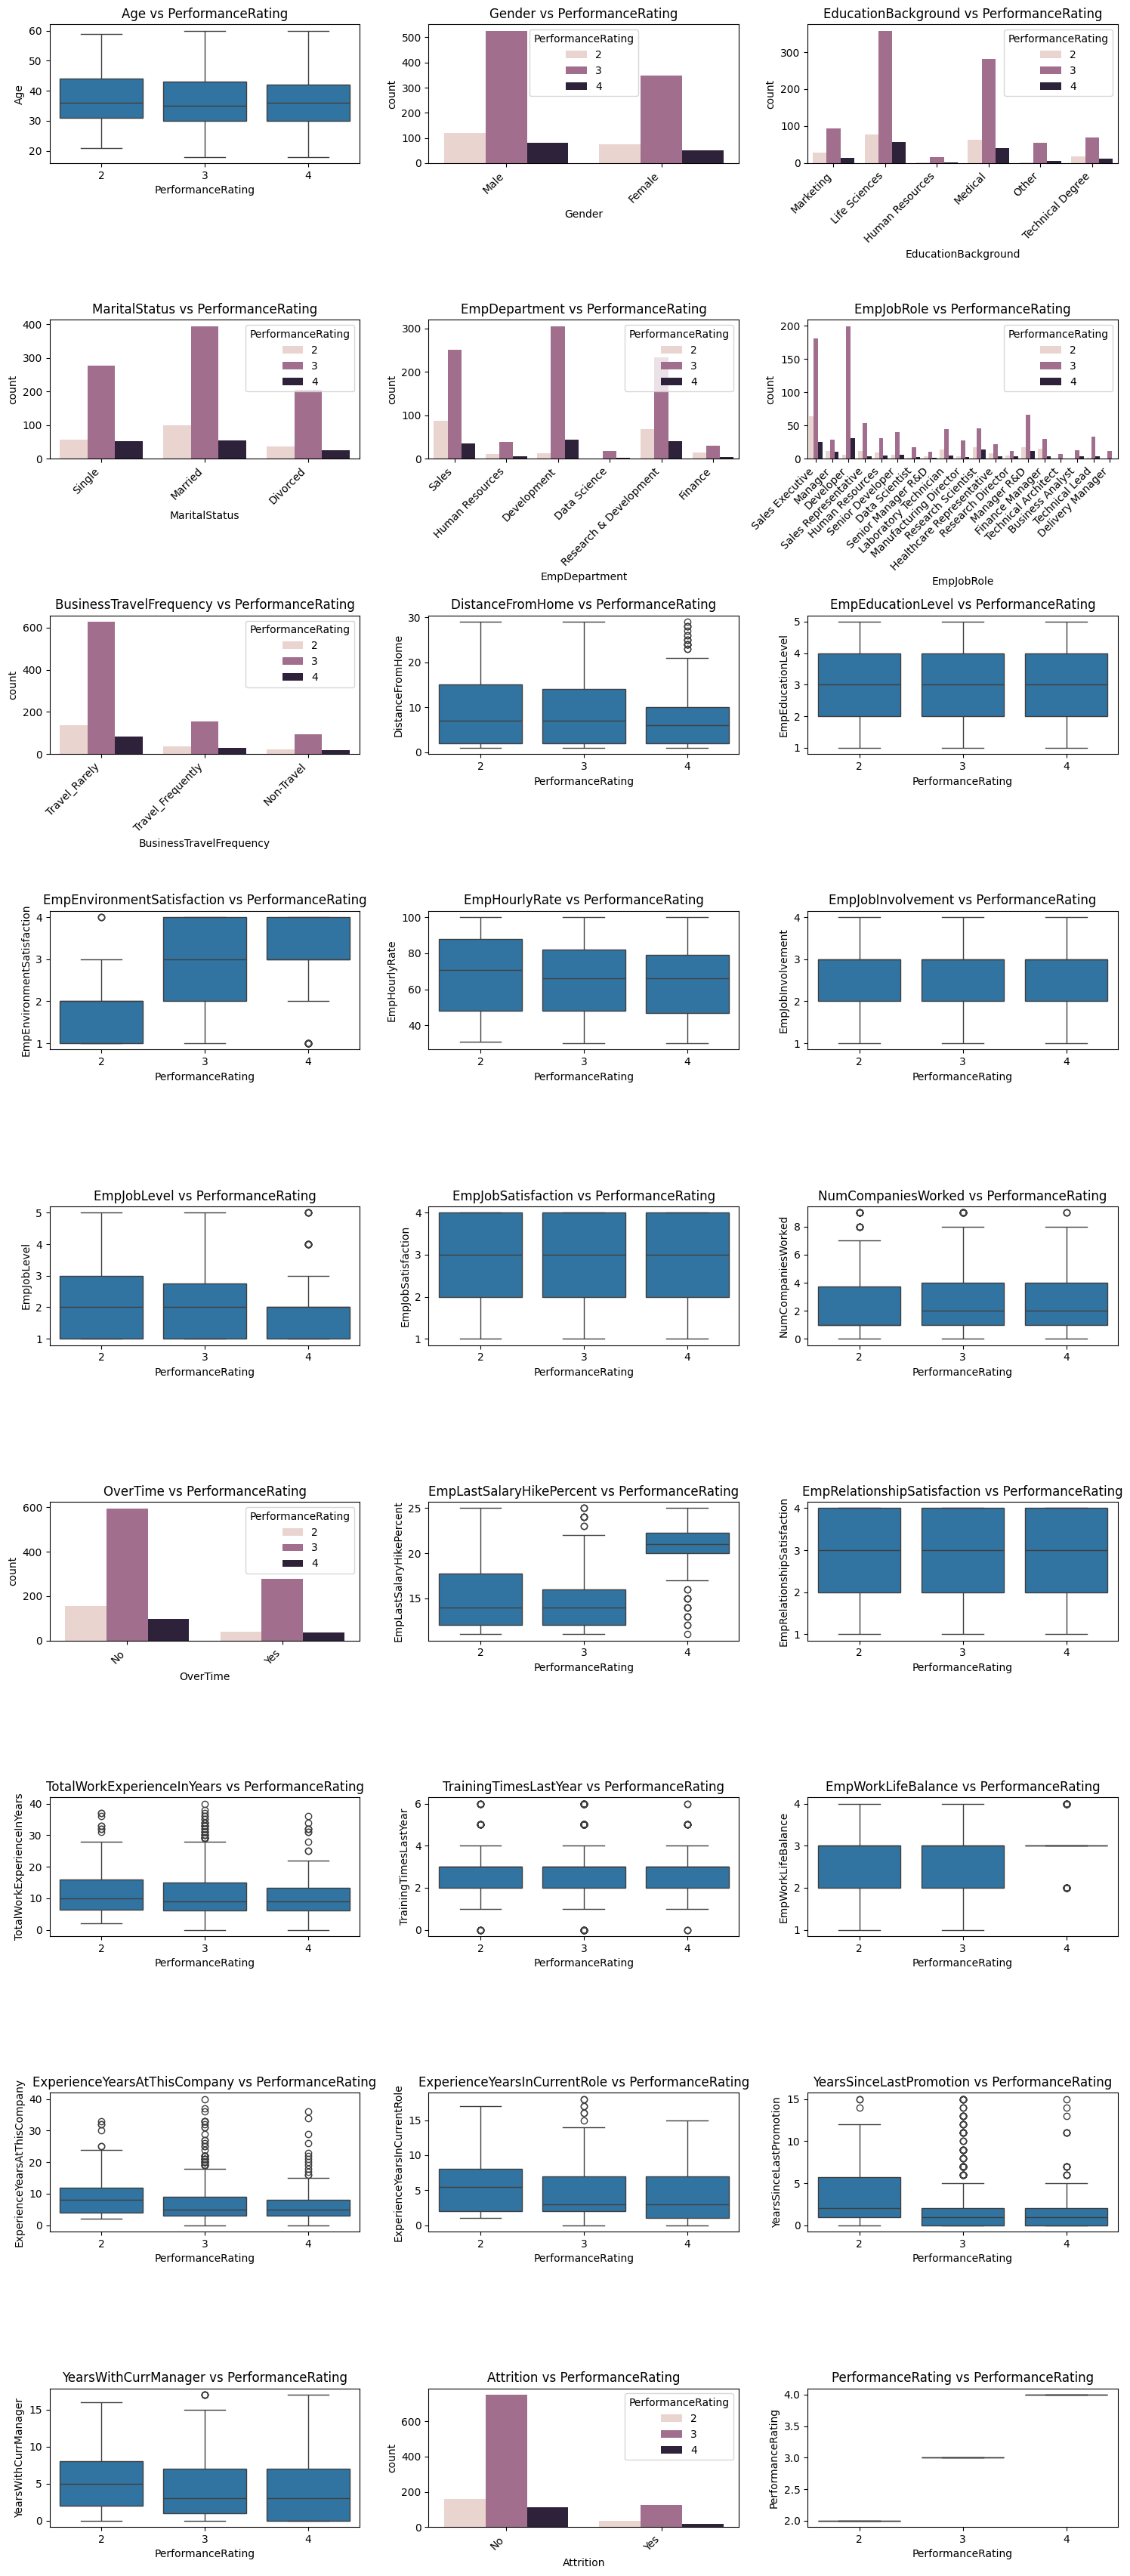

In [ ]:
# Bivariate analysis
cols_to_plot = [col for col in df.columns]
num_cols = 3
num_rows = (len(cols_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows)) # Increased figure height
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    if df[col].dtype == 'object':
        if col != 'PerformanceRating': # Exclude self-comparison
            plt.subplot(num_rows, num_cols, i+1)
            sns.countplot(x=col, hue='PerformanceRating', data=df)
            plt.title(f'{col} vs PerformanceRating')
            plt.xticks(rotation=45, ha='right') #Improved x-axis labels
            plt.tight_layout()
    elif df[col].dtype in ['int64', 'float64']:
      plt.subplot(num_rows, num_cols, i+1)
      sns.boxplot(x='PerformanceRating',y=col, data=df)
      plt.title(f'{col} vs PerformanceRating')
      plt.tight_layout()

plt.tight_layout(rect=[0,0,1,0.95]) # Adjust subplot layout
plt.show()

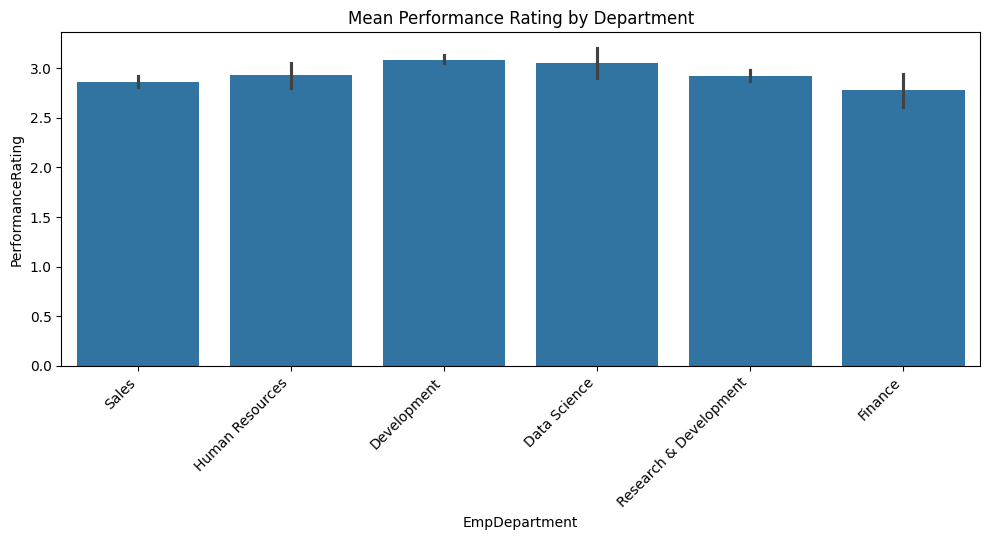

,PerformanceRating
EmpDepartment,
Data Science,3.050000
Development,3.085873
Finance,2.775510
Human Resources,2.925926
Research & Development,2.921283
Sales,2.860590


In [ ]:
# mean performance by EmpDepartment

# Group data by department and calculate the mean performance rating
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean()

# Create a bar plot to visualize the mean performance by department
plt.figure(figsize=(10,5.5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Mean Performance Rating by Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Print the mean performance for each department
department_performance

In [ ]:
# value counts for each EmpDepartment performance rating

department_performance_counts = df.groupby(['EmpDepartment', 'PerformanceRating'])['PerformanceRating'].count().unstack()

# Display the value counts
department_performance_counts

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


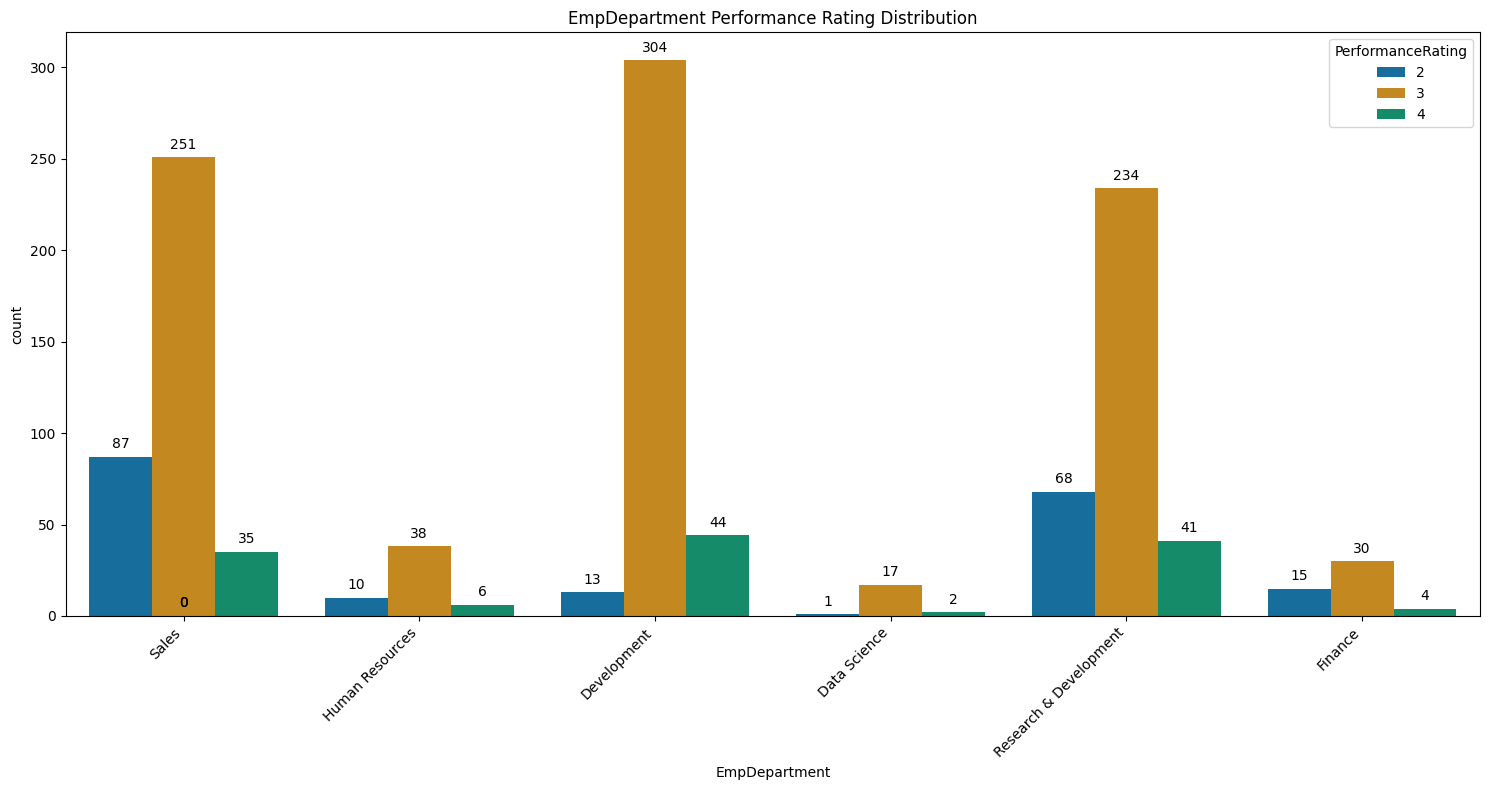

In [ ]:
# Plot of EmpDepartment's performance rating distribution for all departments

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=df, palette="colorblind")
plt.title('EmpDepartment Performance Rating Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

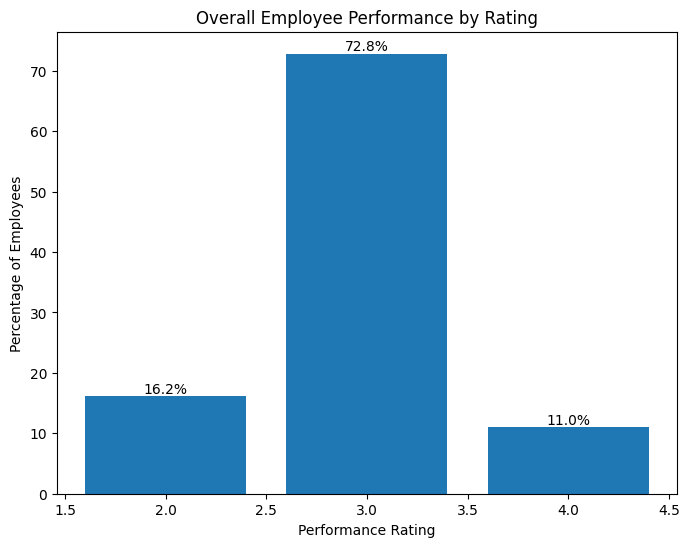

In [ ]:
# visualize overall employee performance by rating.
performance_counts = df['PerformanceRating'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(performance_counts.index, performance_counts.values)
plt.xlabel("Performance Rating")
plt.ylabel("Percentage of Employees")
plt.title("Overall Employee Performance by Rating")

# Add percentage labels to the bars
for bar, percentage in zip(bars, performance_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**General Insights from Numerical Features**

* The employee age ranges from **18** to **60**, with most of the employees lying between age **25** to **40**,

* The distance from home to office ranges from **0** unit to **30** units, with the most of the employees coming from the range of **0** to **5** units,

* Employees have generally worked in multiple companies up to **8**, with most of the employees having worked for up to **2** companies before joining the company (INX Future Inc.),

* The hourly rate range is **65** to **95** for majority employees who work in this company,

* Work experiance range between 0 to 40, with most of the employee experiance ranging between **5** to **10**,

* In general, most of the employees have spent **5** working for INX Future Inc.,

* Most of the employees get **11%** to **15%** of salary hike in this company,

* **72.8%** of overall employees fall under performance rating of **3**, whilst only **11%** have scored performance rating of 4 and **16.2%** rating **2**,

* Average performance rating across all departments is approximately **3**,

* Employee education level ranges between **1** to **5** [below college - doctor], with majority employees having an education level of **3** and **4**. Education levels **1, 2 and 5** constitute total employees of **150, 250, and 50** respectively,

* Employee Environment Statisfaction level ranges from **1 to 4**, with **3 and 4** constituting the highest proportion of employees. **1 and 2** constitute thw least number of employees (approximately **230 and 250** respectively),

* Majority of employees (**700**) have a work life balance score of **3 (Better)**.  The remaining fewer proportions are distributed across levels 1 (Bad), 2 (Good) and 4 (Best).



---


**Impact of Other Features on Performance Rating (Target Feature)**

* Gender vs Performance Rating:
 - Majority male and female employees have a performance rating of **3**,
 - Least number of employees rate **4** for both males and females.

* EducationBackground vs Performance Rating:
 - Majority of life sciences and medical education background employees have performance rating 3,
 - Life sciences and medical education employees constitute higher numbers with performance rating of 4.

* MaritalStatus vs Performance Rating:
 - All employees across the three categories of marital status rate 3,
 - A bigger number from the Married category also have a performance rating of 2.

* Business Travel Frequency vs Performance Rating:
 - Majority of employees who rarely travel have a rating of **3**,
 - Frequent and non - travellers have a similar distribution pattern of performance rating, though they're very few.

* Overtime vs Performance Rating:
 - Majority employees don't do overtime,
 - Highest number of employees rate **3** among both categories doing overtime and those who don't,
 - Least number of employees rate **4** among both categories.

* Attrition vs Performance Rating:
 - A similar distribution pattern shows for those likely to leave (Attrition - Yes) and not likely to leave (Attrition - No), where majority rate 3, followed by 2 and 4 being the least.

 * EmpEducationLevel vs Performance Rating:
 - There is equal distribution of employee education level across the performance bands [3,4 & 2].

* EmpEnvironmentSatisfaction vs Performance Rating:
 - Majority employees with performance rating of 3 are in the range of EmpEnvironmentSatisfaction 2 - 4 and a median of 3,
 - Employees with performance rating of 4 are in the range of EmpEnvironmentSatisfaction 3 - 4,
 - Employees with performance rating 2 are in the range of EmpEnvironmentSatisfaction 1 - 2.

* EmpJobInvolvement vs Performance Rating:
 - There is equal distribution of employee job involvement level across the performance bands [3,4 & 2],
 - Employees with job involvement of 2 & 3 mostly have performance rating 3.

* EmpJobLevel vs Performance Rating:
 - Performance rating 2 and 3 have the highest proportion of employees with job levels 1 - 3 and a median job level of 2,
 - Performance rating 4 has the least proportion of employees, with job levels 1 and 2, as well as some outliers in job levels 4 and 4.

* EmpJobSatisfaction vs Performance Rating:
 - There is equal distribution of employee job satisfaction across the performance bands [3,4 & 2],
 - Majority job satisfaction range between 2 - 4, with median of 3.

* EmpWorkLifeBalance vs Performance Rating:
 - There is equal distribution of work life balance across the performance bands [3 & 2], with EmpWorkLifeBalance of 2 and 3
 - A very small proportion falls under performance rating 4, with median EmpWorkLifeBalance of 3 and some outliers in EmpWorkLifeBalance of 2 and 4.

* YearsSinceLastPromotion vs Performance Rating:
 - Performance rating 2 shows a large proportion of employees in the range of 0 - 5 years since last promotion, up to an upper quartile of about 13 years,
 - Performance rating of 3 is dominated by employees recently promoted, with a median of about 1 year and upper quartile of 5 years,
 - Performance rating of 4 follows a similar pattern with rating 3, except that there are very few employees in the outlier range of 5 to 15 years since last promotion.
 - _**NB:** employees that have overstayed in the same grade tend to perform less._